# Banknote Authentication Model



# Introduction
    This project is created for checking multiple classifiers on the UCI Banknote Authentication Data Set( https://archive.ics.uci.edu/ml/datasets/banknote+authentication). 

In [49]:
from IPython.display import IFrame
IFrame('https://archive.ics.uci.edu/ml/datasets/banknote+authentication', width=800, height=450)

# Objective
    Main objective of this project is to evaluate, which classifier provides the best optimal solution for classifying whether a note is authentic or not.

# Importing Necessary Packages
    We are going to use python for this project. so first step is to getting all the necessary pckages

In [26]:
import numpy as np
np.__version__

'1.16.5'

In [27]:
import pandas as pd # for loading the CSV data
pd.__version__

'0.25.1'

In [46]:
from sklearn.model_selection import train_test_split # for spliting data into Training set and Test set
from sklearn import metrics # for evaluating the models

In [142]:
from sklearn.neighbors import KNeighborsClassifier # for applying Knn classifier
from sklearn import svm # for applying svm
from sklearn.neural_network import MLPClassifier # for appling Neural Network

In [47]:
%matplotlib notebook
import matplotlib.pyplot as plt # for ploting the evaluating metrics

# Loading & Pre-processing The DataSet
    The data set is in CSV(Comma seperated Value) format. We are using pandas for importing this dataset

In [30]:
features_name= ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]  # These are the features list for our dataset
banknote_data_set= pd.read_csv('data_banknote_authentication.csv', names= features_name)
banknote_data_set.head(5) # geting a snapshot of our data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Non-Numeric Values
    Our dataset dosen't contain any Non-Numeric value so we don't have to worry about that.


## Null Value
    Our dataset dose't have any null value so we don't have to wory about that.

## Standardization & Normalization
    Our dataset contains continious values so the values in all the columns are not in same range so we are performing Normalization and the scale across all the data are also not same so one value may get uncondition prority than others thats why we are performing Standardization.

In [31]:
print("{0:2}\t{1:20}\t{2:10}".format("No", "Mean", "Std"))
for column_name in features_name[0:3]:  # for all the columns except the last one
  column_mean= banknote_data_set[column_name].mean()
  print("{0:2d}\t{1}".format( features_name.index(column_name) + 1, column_mean), end="\t")

  column_std= banknote_data_set[column_name].std()
  print("{}".format(column_std))

  banknote_data_set[column_name]= (banknote_data_set[column_name]-column_mean)/column_std

banknote_data_set.head(5)

No	Mean                	Std       
 1	0.4337352570699707	2.842762586278562
 2	1.9223531206393603	5.869046743695522
 3	1.3976271172667651	4.310030090106595


,Variance,Skewness,Curtosis,Entropy,Class
0,1.121397,1.149036,-0.975614,-0.44699,0
1,1.446538,1.064065,-0.894710,-1.46210,0
2,1.207369,-0.777069,0.122174,0.10645,0
3,1.063355,1.295005,-1.254940,-3.59440,0
4,-0.036758,-1.086642,0.736462,-0.98880,0


## Spliting the features and class colum
    The imported data have all it's values in the same data frame table witch is hard to work with, so we are spliting it into two parts one is for features an another is for output classes.

## Converting The Data Frame to ndArray
    Working with pandas data frame is problematic and it may produce inconcistency with sklearn packages so we are converting the Data Frame to ndArray.

In [32]:
features= banknote_data_set[features_name[0:3]].to_numpy()
classes= banknote_data_set[features_name[-1]].to_numpy()

print("Features ndArray: ", features, end="\n\n")
print("Classes ndArray: ", classes)

Features ndArray:  [[ 1.12139676  1.14903615 -0.97561433]
 [ 1.44653822  1.06406494 -0.89471002]
 [ 1.20736947 -0.7770688   0.12217383]
 ...
 [-1.47182015 -2.62069017  3.75764729]
 [-1.40617978 -1.75583081  2.55111279]
 [-1.04674069 -0.43966137  0.29850671]]

Classes ndArray:  [0 0 0 ... 1 1 1]


## Train-Test Set Split
    To evaluate how the classifiers perform on the priviously unseen data we are going to split our original dataset into two sets one for training purpose and another for testing purpose.

In [33]:
train_features, test_features, train_classes, test_classes= train_test_split(features, classes, test_size= 0.3)

print("Train Features: \n\n", train_features, end="\n\n")
print("Train Classes: \n\n", train_classes, end="\n\n")
print("Test Features: \n\n", test_features, end="\n\n")
print("Test Classes: \n\n", test_classes)

Train Features: 

 [[ 0.78732032  0.19462222 -0.23806031]
 [-1.56718513 -2.50857657  3.29980826]
 [ 0.07965658  1.44238873 -0.64976974]
 ...
 [-1.02232781 -0.39594217  0.020388  ]
 [ 0.09566917 -1.26433703  1.61000567]
 [ 0.69209605 -0.05112468  0.37901658]]

Train Classes: 

 [0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1
 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1
 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 

# K-Nearest Neighbour
    KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

## Working Principle
    In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case.
    
![KNN](img/Knn_k1_z96jba.png)
    
    Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:
    
    1. Calculate distance
    2. Find closest neighbors
    3. Vote for labels

## Creating The Model

In [41]:
test_set_no,_ = train_features.shape # geting Training set size
print("Test set size:", test_set_no)

x_neighbors= list(range(1, (test_set_no//2))) # List of all the possible K values
print("No of K Neighbors:", len(x_neighbors))

Test set size: 960
No of K Neighbors: 479


### Evaluating The Best Value of K

In [42]:
y_train_knn= list()
y_test_knn= list()

for neighbors in x_neighbors:
    
    knn_model= KNeighborsClassifier(n_neighbors= neighbors) # creating the classifier object
    knn_model.fit(train_features, train_classes) # Training the model

    train_predict_knn= knn_model.predict(train_features) # Testing the model on Training Set
    y_train_knn.append(metrics.accuracy_score(train_classes, train_predict_knn)) # calculating accuracy on Training set
    
    test_predict_knn= knn_model.predict(test_features) # Testing the model on Test set 
    y_test_knn.append(metrics.accuracy_score(test_classes, test_predict_knn)) # calculating accuracy on test set

    # print("{0:3}\t\t{1:20}\t\t{2:2}".format(neighbors, metrics.accuracy_score(train_classes, train_predict), metrics.accuracy_score(test_classes, test_predict))) #evaluating the model

### Ploting Train & Test Accuracy

<IPython.core.display.Javascript object>


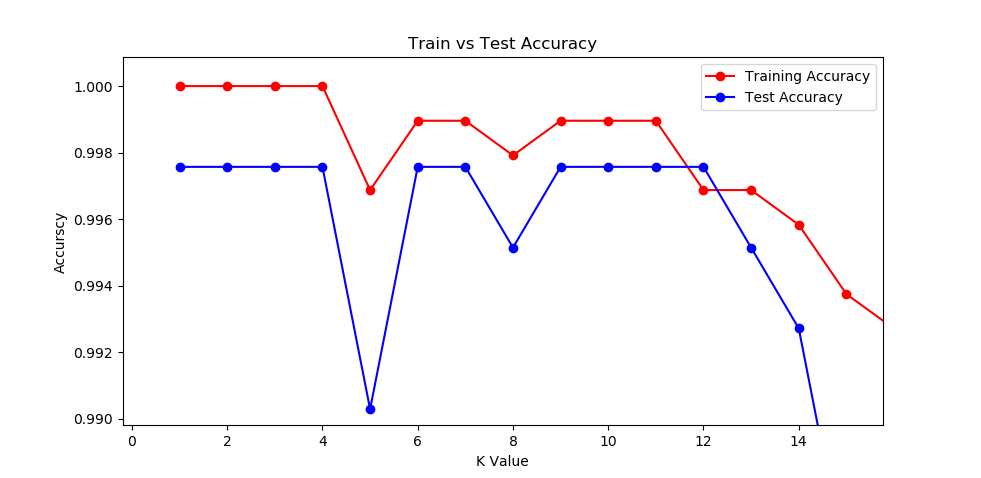

In [43]:
plt.plot(x_neighbors, y_train_knn, color='red', marker="o", label= 'Training Accuracy')
plt.plot(x_neighbors, y_test_knn, color= 'blue', marker="o", label= "Test Accuracy")
plt.legend()
plt.xlabel("K Value")
plt.ylabel("Accurscy")
plt.title("Train vs Test Accuracy")
plt.show()

### Final Model
    From the above plot we can observe that at ** k=11 ** the accuracy of Training set and Testing set is nearly the same. so finally we are training our model with ** k=11 **

In [44]:
knn_model= KNeighborsClassifier(n_neighbors= 11) # creating the classifier object
knn_model.fit(train_features, train_classes) # Training the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

## Evaluating Accuracy on the TestSet

In [45]:
test_predict_knn= knn_model.predict(test_features) # Testing the model on Test set
print("Testing Set Accuracy at K= 11: {}".format(metrics.accuracy_score(test_classes, test_predict_knn)))

Testing Set Accuracy at K= 11: 0.9975728155339806


# Support Vector Machine
    SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces.
    
    SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.
![SVM](img/index3_souoaz.png)

## Basic Terms
    There are some basic terms involved with svm. Here we discussedd all of them.

### Support Vectors
    Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

### Hyperplane
    A hyperplane is a decision plane which separates between a set of objects having different class memberships.

### Margin
    A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

## Nonlinear data
![nonLinear_SVM](img/plot_circle_01.png)

    It’s pretty clear that there’s not a linear decision boundary (a single straight line that separates both tags). However, the vectors are very clearly segregated and it looks as though it should be easy to separate them.
    
    we will add a third dimension. Up until now we had two dimensions: x and y. We create a new z dimension, and we rule that it be calculated a certain way that is convenient for us: z = x² + y²
![nonLinear_SVM_3rdDimention](img/plot_circle_02.png)

    Note that since we are in three dimensions now, the hyperplane is a plane parallel to the x axis at a certain z (let’s say z = 1).

## The kernel trick
    The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space.

### Linear Kernel
    A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
    
    K(x, xi) = sum(x * xi)

### Polynomial Kernel
    A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
    
    K(x,xi) = 1 + sum(x * xi)^d
    
    Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

### Radial Basis Function Kernel
     RBF can map an input space in infinite dimensional space.
     
     K(x,xi) = exp(-gamma * sum((x – xi^2))
     
     Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

## Creating The Model

In [141]:
x_c_values= list(np.arange(0, 10, 0.03)[1:])

print("Testing C values(first 5): ", x_c_values[0:5])

Testing C values(first 5):  [0.03, 0.06, 0.09, 0.12, 0.15]


### Evaluating C Value

In [127]:
y_train_svm= list()
y_test_svm= list()

for cvalue in x_c_values:
    
    svm_model= svm.SVC(C=cvalue, kernel='rbf', gamma= 'auto') # Creating SVM object
    svm_model.fit(train_features, train_classes) # Training the model on training set
    
    train_predict_svm= svm_model.predict(train_features) # Predicting on Training sest
    y_train_svm.append(metrics.accuracy_score(train_classes, train_predict_svm)) # Accuracy of Training set
    
    test_predict_svm= svm_model.predict(test_features) # Predicting on Test set
    y_test_svm.append(metrics.accuracy_score(test_classes, test_predict_svm)) # Accuracy of Test set

### Ploting Train & Test Accuracy

<IPython.core.display.Javascript object>


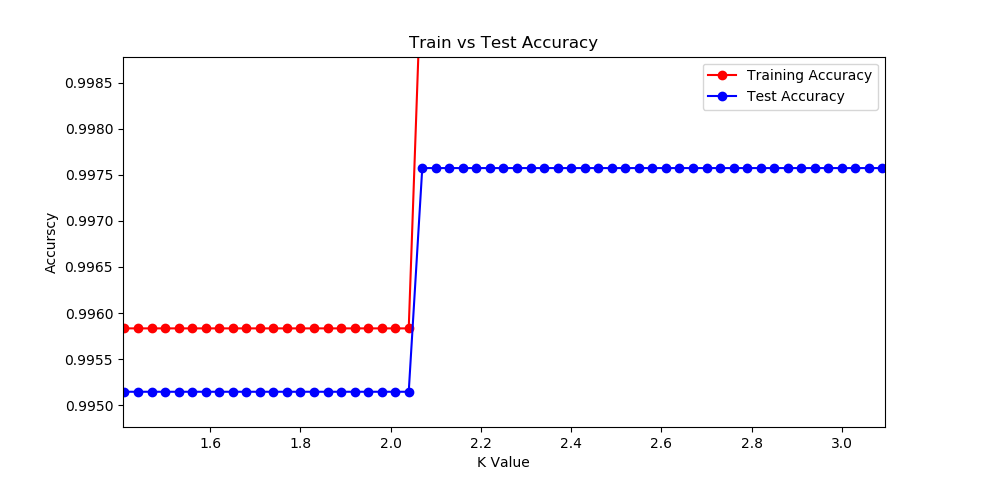

In [128]:
plt.plot(x_c_values, y_train_svm, color='red', marker="o", label= 'Training Accuracy')
plt.plot(x_c_values, y_test_svm, color= 'blue', marker="o", label= "Test Accuracy")
plt.legend()
plt.xlabel("C Value")
plt.ylabel("Accurscy")
plt.title("Train vs Test Accuracy")
plt.show()

### Final Model
    From the above plot we can observe that at ** c=2.04 ** the accuracy of Training set and Testing set is nearly the same. so finally we are training our model with ** k=2.04 **

In [137]:
svm_model= svm.SVC(C=2.1, kernel='rbf', gamma= 'auto') # Creating SVM object
svm_model.fit(train_features, train_classes) # Training the model on training set

SVC(C=2.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Evaluating Accuracy on TestSet

In [138]:
test_predict_svm= svm_model.predict(test_features) # Predicting on Test set
print("Testing Set Accuracy at C= 2.1: {}".format(metrics.accuracy_score(test_classes, test_predict_svm)))

Testing Set Accuracy at C= 2.1: 0.9975728155339806


# Neural Network
    Neural networks are created by adding the layers of these perceptrons together, known as a multi-layer perceptron model. There are three layers of a neural network - the input, hidden, and output layers. The input layer directly receives the data, whereas the output layer creates the required output. The layers in between are known as hidden layers where the intermediate computation takes place.
    

## Feed-Forward
    Following are the steps performed during the feed-forward phase:
    
    1. The values received in the input layer are multiplied with the weights. A bias is added to the summation of the inputs and weights in order to avoid null values.
    
    2. Each neuron in the first hidden layer receives different values from the input layer depending upon the weights and bias. Neurons have an activation function that operates upon the value received from the input layer. The activation function can be of many types, like a step function, sigmoid function, relu function, or tanh function. As a rule of thumb, relu function is used in the hidden layer neurons and sigmoid function is used for the output layer neuron.
    
    3. The outputs from the first hidden layer neurons are multiplied with the weights of the second hidden layer; the results are summed together and passed to the neurons of the proceeding layers. This process continues until the outer layer is reached. The values calculated at the outer layer are the actual outputs of the algorithm.

## Network Architecture

![Neural_Network](img/ann-in-hidden-out.jpg)

## Back Propagation
    Back propagation phase consists of the following steps:
    
![Back_Propagation_Step](img/tikz21.png)

    The backpropagation equations provide us with a way of computing the gradient of the cost function. Let's explicitly write this out in the form of an algorithm:

**Input x:** Set the corresponding activation a1 for the input layer.

**Feedforward:** For each l=2,3,…,L compute 

                    zl=wlal−1+bl and al=σ(zl)
                    
**Output error δL:** Compute the vector

                    δL=∇aC⊙σ′(zL)
                    
**Backpropagate the error:** For each l=L−1,L−2,…,2 compute 

                    δl=((wl+1)Tδl+1)⊙σ′(zl)
                    
**Output:** The gradient of the cost function is given by 

                    ∂C∂wljk=al−1kδlj and ∂C∂blj=δlj

## Creating The Model

In [152]:
nn_model= MLPClassifier() # Creating neural network object
nn_model.fit(train_features, train_classes)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Evaluating Accuracy on TestSet

In [153]:
test_predict_nn= nn_model.predict(test_features)
print("Neural Network Acurracy on Test Set= {}".format(metrics.accuracy_score(test_classes, test_predict_nn)))

Neural Network Acurracy on Test Set= 1.0
